# Carregar Dataset

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [ ]:
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/student_exam_data.csv')

print(df.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


# Features e Target

In [ ]:
X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

In [ ]:
print(X, "\n")
print(y)

[[ 4.37086107 81.88970284]
 [ 9.55642876 72.16578198]
 [ 7.58794548 58.57165698]
 [ 6.38792636 88.82770118]
 [ 2.40416776 81.08387035]
 [ 2.40395068 49.75701636]
 [ 1.52275251 94.65563107]
 [ 8.79558531 89.35223458]
 [ 6.41003511 96.9879948 ]
 [ 7.3726532  83.5431705 ]
 [ 1.18526045 76.80491176]
 [ 9.72918867 65.09458218]
 [ 8.49198377 95.963709  ]
 [ 2.911052   91.96383337]
 [ 2.6364247  42.71312021]
 [ 2.65064059 41.58201847]
 [ 3.73818019 62.58780201]
 [ 5.72280788 88.63319985]
 [ 4.88750517 99.23656776]
 [ 3.62106226 49.02501347]
 [ 6.50667605 75.64784292]
 [ 2.25544475 62.8534514 ]
 [ 3.62930184 98.19486387]
 [ 4.29725659 90.52713539]
 [ 5.10462986 90.29972228]
 [ 8.06658365 68.12158959]
 [ 2.79706404 64.88917014]
 [ 5.62810995 56.40442432]
 [ 6.33173112 43.3825298 ]
 [ 1.41805371 91.88334258]
 [ 6.46790367 88.77406055]
 [ 2.53471711 99.9830604 ]
 [ 1.58546434 99.79821022]
 [ 9.53996984 73.32590234]
 [ 9.6906883  86.13924491]
 [ 8.27557613 96.68594379]
 [ 3.74152392 90.97884344]
 

# Preparação para treinamento

In [ ]:
# Dividindo em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Normalizando features com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Conversão para tensores PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # unsqueeze(1) para ter a forma (N, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
y_train_tensor

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
      

In [ ]:
X_train_tensor

tensor([[ 0.4603,  0.3949],
        [-0.3337,  1.0432],
        [-1.2937, -0.4044],
        [ 0.0504, -1.5065],
        [ 0.2296,  1.1098],
        [ 0.3435, -0.7218],
        [-0.6760,  0.8399],
        [ 0.1069,  0.6691],
        [ 0.8049,  1.6694],
        [ 0.1158,  0.6546],
        [ 0.1226,  1.1693],
        [-0.3801,  0.5966],
        [-0.8378,  1.5975],
        [-0.5612, -0.2312],
        [-1.3987,  1.6572],
        [ 0.5383,  0.4228],
        [ 0.4660, -1.4775],
        [-0.7038, -0.7684],
        [-1.4862,  0.8886],
        [ 0.9748, -0.0163],
        [ 0.8023,  0.3063],
        [ 1.1920,  0.8289],
        [ 0.6331, -1.1239],
        [ 1.2529, -0.0955],
        [-0.0648, -1.5789],
        [ 1.5854,  1.5662],
        [-0.1973,  1.4780],
        [-0.6496,  1.2078],
        [ 0.8618, -0.8649],
        [ 0.4994, -1.2840],
        [ 1.6086,  0.1242],
        [-1.0479,  1.7877],
        [-1.3194, -0.5830],
        [ 1.6634, -1.2552],
        [ 0.5259, -0.1674],
        [ 1.5954,  1

# Criando Modelo

In [ ]:
# Definindo o número de features (colunas em X)
input_size = X_train_tensor.shape[1]
output_size = 1 # Apenas uma saída. Pass/Fail

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        # 1. Camada Linear: w*x + b
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        # 2. Aplica a Sigmoid ao resultado da camada linear
        # nn.Sequential(nn.Linear(input_size, 1), nn.Sigmoid()) também seria válido
        out = torch.sigmoid(self.linear(x))
        return out

In [ ]:
# Inicializa o modelo
model = LogisticRegressionModel(input_size)

# Treinamento do Modelo

In [ ]:
# Definição da Função de Perda
criterion = nn.BCELoss()

# Definição do Otimizador
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 3. Treinamento
loss_history = []
num_epochs = 10000

print(f"Iniciando o Treinamento por {num_epochs} épocas...")

for epoch in range(num_epochs):
    # Passa para frente (Forward pass)
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss_history.append(loss.item())

    # Passa para trás (Backward pass) e Otimização
    optimizer.zero_grad() # Zera os gradientes
    loss.backward()       # Calcula os gradientes (backpropagation)
    optimizer.step()      # Atualiza os pesos

    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Perda (Loss): {loss.item():.4f}')

print("Treinamento concluído")

Iniciando o Treinamento por 10000 épocas...
Época [100/10000], Perda (Loss): 0.4264
Época [200/10000], Perda (Loss): 0.3418
Época [300/10000], Perda (Loss): 0.3099
Época [400/10000], Perda (Loss): 0.2946
Época [500/10000], Perda (Loss): 0.2865
Época [600/10000], Perda (Loss): 0.2819
Época [700/10000], Perda (Loss): 0.2792
Época [800/10000], Perda (Loss): 0.2776
Época [900/10000], Perda (Loss): 0.2767
Época [1000/10000], Perda (Loss): 0.2761
Época [1100/10000], Perda (Loss): 0.2758
Época [1200/10000], Perda (Loss): 0.2756
Época [1300/10000], Perda (Loss): 0.2755
Época [1400/10000], Perda (Loss): 0.2755
Época [1500/10000], Perda (Loss): 0.2755
Época [1600/10000], Perda (Loss): 0.2755
Época [1700/10000], Perda (Loss): 0.2754
Época [1800/10000], Perda (Loss): 0.2754
Época [1900/10000], Perda (Loss): 0.2754
Época [2000/10000], Perda (Loss): 0.2754
Época [2100/10000], Perda (Loss): 0.2754
Época [2200/10000], Perda (Loss): 0.2754
Época [2300/10000], Perda (Loss): 0.2754
Época [2400/10000], Pe

#Avaliação do Modelo

In [ ]:
# Coloca o modelo em modo de avaliação
model.eval()

with torch.no_grad(): # Desativa o cálculo de gradiente durante a avaliação
    # Obter probabilidades no conjunto de teste
    y_predicted_prob = model(X_test_tensor)

    # Converter probabilidades em classes binárias (0 ou 1)
    # 0.5 é o limiar padrão para classificação binária.
    y_predicted_cls = (y_predicted_prob >= 0.5).float()

    # Calcular a Acurácia
    correct = (y_predicted_cls == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total

    # Exibir resultados
    print("\n--- Resultados de Avaliação ---")
    print(f"Total de amostras de teste: {total}")
    print(f"Corretamente classificadas: {correct}")
    print(f"Acurácia do Modelo: {accuracy*100:.2f}%")


--- Resultados de Avaliação ---
Total de amostras de teste: 100
Corretamente classificadas: 87
Acurácia do Modelo: 87.00%


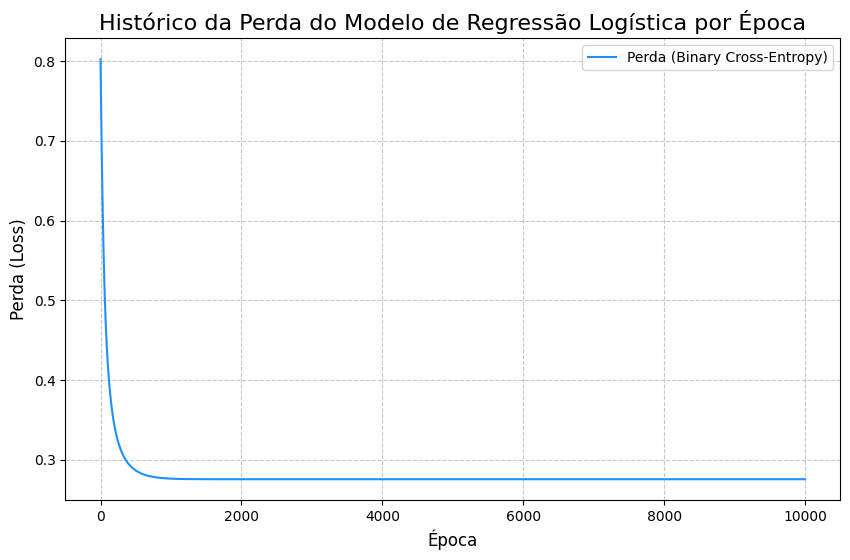

In [ ]:
# Visualização da perda do modelo em função das épocas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Perda (Binary Cross-Entropy)', color='dodgerblue')
plt.title('Histórico da Perda do Modelo de Regressão Logística por Época', fontsize=16)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Perda (Loss)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()